In [198]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
import sklearn.pipeline
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import det
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Задача 4

Исходная функция: $f(x) = \cos{x} + \log(1 + e^{x-5})$

In [150]:
def func(x):
    return np.cos(x) + np.log(1 + np.exp(x-5))

Сгенерируем выборку.

In [164]:
X_train = sps.uniform.rvs(loc=0, scale=10, size=20)
Y_train = func(X_train) + sps.norm.rvs(scale=0.1, size=20)

X_test = sps.uniform.rvs(loc=0, scale=10, size=1000)
Y_test = func(X_test) + sps.norm.rvs(scale=0.1, size=1000)

Y_train = Y_train.reshape(len(Y_train),1)
Y_test = Y_test.T.reshape(len(Y_test),1)

Функция для представления в полиномиальном виде.

In [167]:
def get_polynomial_representation(x, d):
    representation = []
    for degree in range(d):
        representation.append(x ** degree)
    return np.array(representation).T

Класс для линейной регрессии.

In [394]:
class My_regression:
    
    #def fit(self, X_train, Y_train):
    #    self.W = np.linalg.lstsq(X_train, Y_train)[0]
    
    def fit(self, X_train, Y_train):
        train_matrix = np.matrix(X_train)
        y_matrix = np.matrix(Y_train)
        self.W = (train_matrix. T * train_matrix).getI() * train_matrix.T * y_matrix
    
    def fit_regulate(self, X_train, Y_train, lambda_):
        train_matrix = np.matrix(X_train)
        y_matrix = np.matrix(Y_train)
        regulator = lambda_ * np.eye(len(X_train[0]))
        self.W = (train_matrix. T * train_matrix + regulator).getI() * train_matrix.T * y_matrix
    
    def predict(self, X_test):
        return np.array(np.matrix(X_test) * self.W)

Нарисуем графики из задания.

/usr/lib/python3/dist-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)
/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


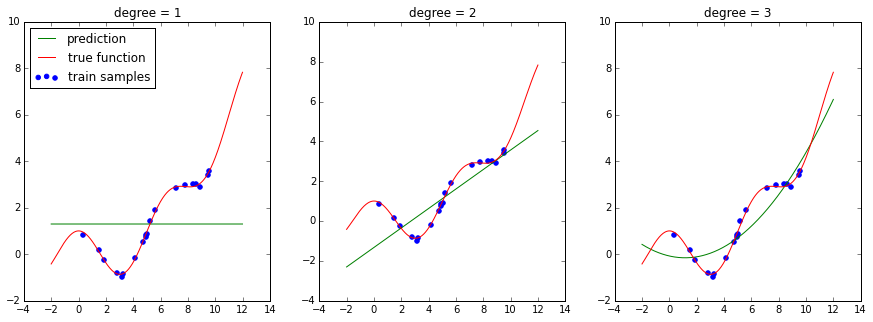

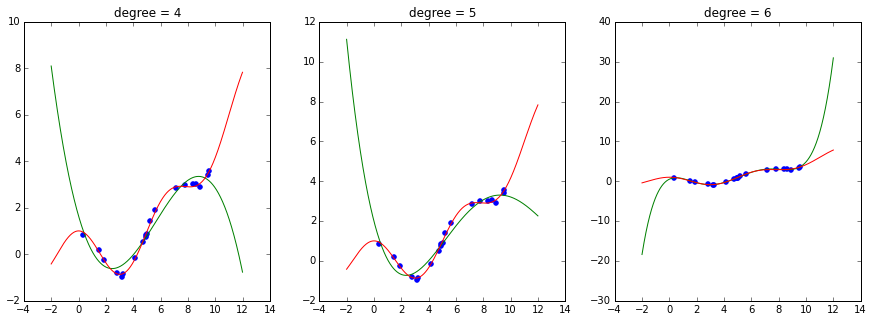

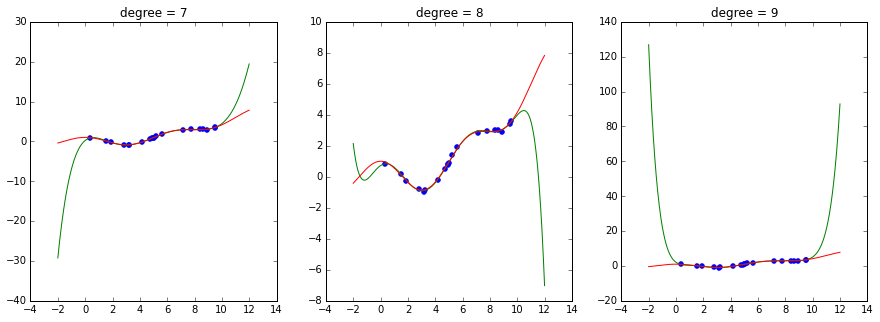

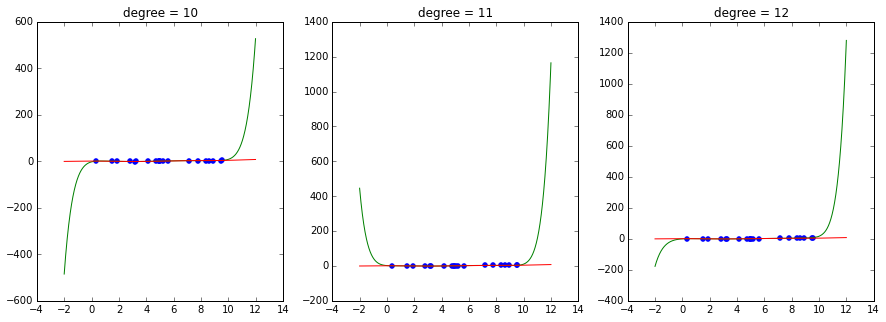

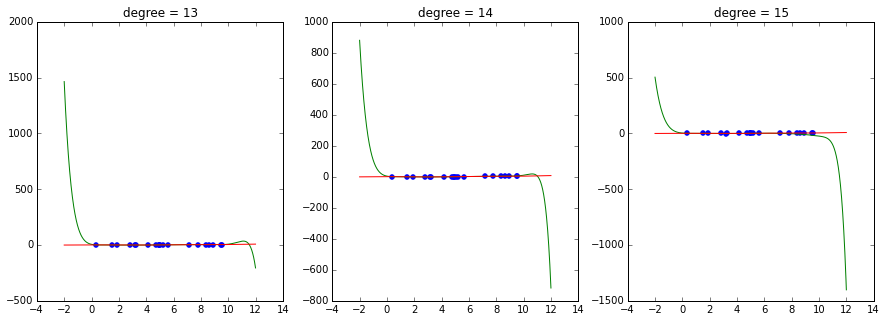

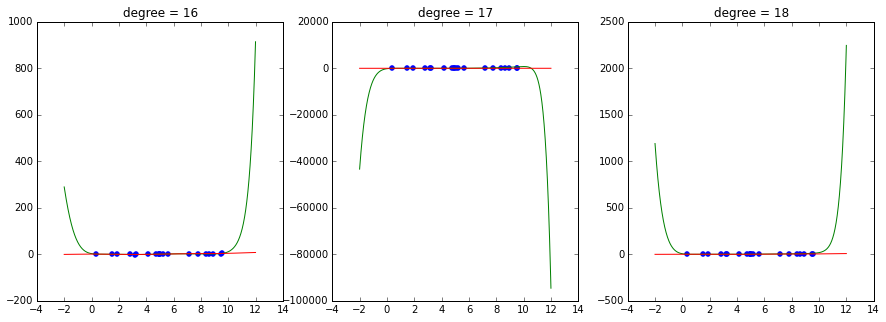

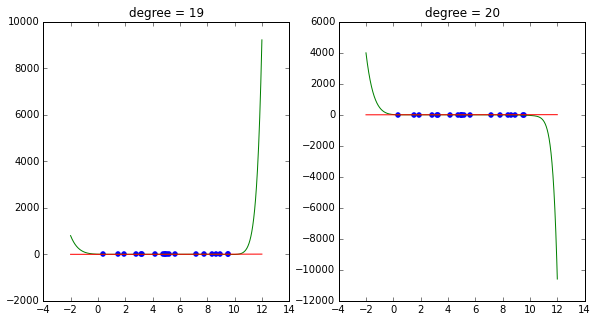

In [398]:
grid = np.arange(-2, 12, 0.01)
for d in range(1, 21):
    X_train_polynom = get_polynomial_representation(X_train, d)
    X_test_polynom = get_polynomial_representation(X_test, d)
    
    model = My_regression()
    model.fit(X_train_polynom, Y_train)
    
    if d % 3 == 1: plt.figure(figsize=(15,5))    
    plt.subplot(1, 3, d%3)
    plt.scatter(X_train, Y_train, color='blue',label='train samples')
    plt.plot(grid, model.predict(get_polynomial_representation(grid, d)), color='green', label='prediction')
    plt.plot(grid, func(grid), color='red', label='true function')
    if d == 1: plt.legend(loc=2)
    plt.title('degree = {}'.format(d))
    if d % 3 == 0: plt.show()

Посчитаем ошибку MSE и определитель $|\ X_{tr}^T X_{tr}\ |$ для каждой степени $d, d \in \{0, 20\}.$

In [399]:
def mse(prediction, test):
    return np.mean((prediction - test) ** 2)

In [400]:
errors = []
dets = []
for d in range(1,21):
    model = My_regression()
    X_train_polynom = get_polynomial_representation(X_train, d)
    
    model.fit(X_train_polynom, Y_train)
    prediction = model.predict(get_polynomial_representation(X_test, d))
    errors.append(mse(Y_test.ravel(), prediction.ravel()))
    
    train_matrix = np.matrix(X_train_polynom)
    dets.append(det(train_matrix.T * train_matrix))
dets = np.array(dets)
#dets = 1 * (dets < 0.0001)+ dets

Опеределители улетели в обе бесконечности, поэтому я ограничила их сверху и снизу и нарисовала получившийся график(без логарифма).

In [401]:
dets

array([  2.00000000e+001,   2.91801703e+003,   2.93811169e+006,
         1.47589371e+010,   5.62699793e+014,   7.83951360e+019,
         6.08350054e+025,   9.82395859e+031,   6.54642969e+038,
         2.20133177e+046,   1.63118722e+054,  -6.63193292e+063,
        -6.77427195e+074,  -5.66656900e+087,  -9.40642304e+101,
        -8.38895742e+117,   2.31204509e+134,  -3.76300377e+156,
        -6.43548624e+178,   1.15290994e+202])

In [402]:
dets = 1 * (dets > 100) + -1 * (dets < -100)
dets

array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1])

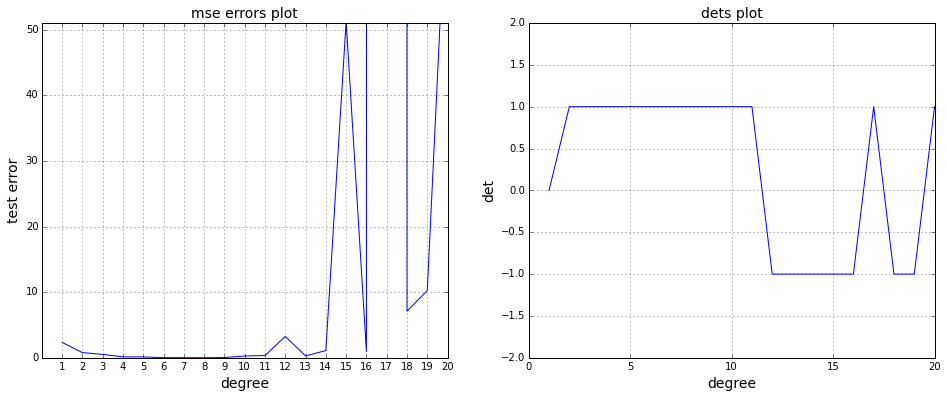

In [403]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('mse errors plot', fontsize=14)
plt.xlabel('degree', fontsize=14)
plt.ylabel('test error', fontsize=14)
plt.plot(range(1,21), errors)
plt.xticks(range(1,21))
plt.grid()
plt.ylim((0,51))


plt.subplot(1,2,2)
plt.title('dets plot', fontsize=14)
plt.xlabel('degree', fontsize=14)
plt.ylabel('det', fontsize=14)
plt.plot(range(1,21), dets)
plt.grid()
plt.ylim((-2, 2))
plt.show()

In [405]:
print('Для дальнейшего исследования я выбрала $d = 15,$ ошибка MSE при $d = 15$ степени: {}'.format(errors[14]))

Для дальнейшего исследования я выбрала $d = 15,$ ошибка MSE при $d = 15$ степени: 51.23754714722819


Построим логарифмическую сетку от 0.1 до 150

In [408]:
log_grid = [0.1]
while log_grid[-1] < 150:
    log_grid.append(log_grid[-1] * 2)
log_grid = log_grid[:-1]

Нарисуем графики для каждого $\lambda$ из сетки

/usr/lib/python3/dist-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)
/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


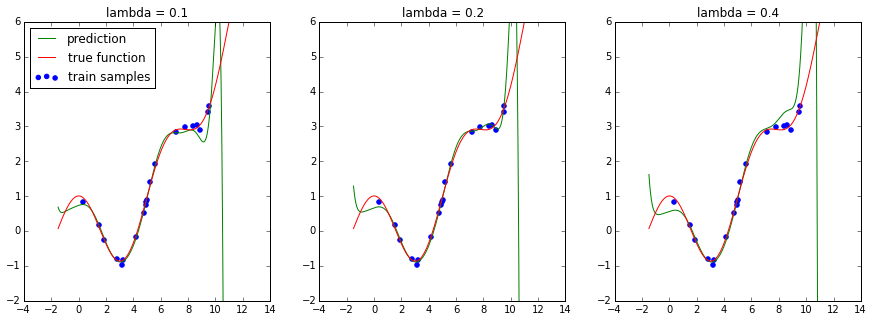

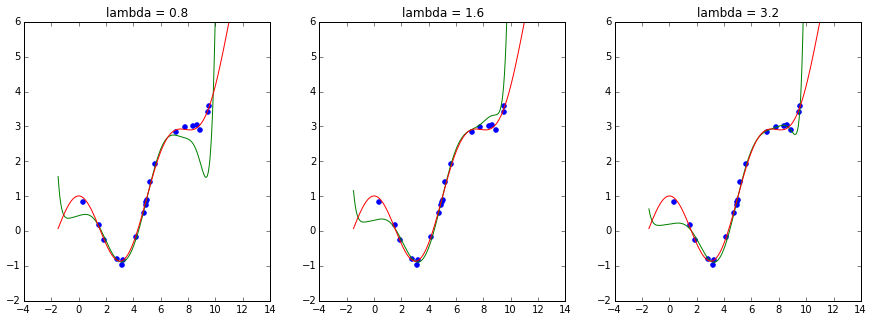

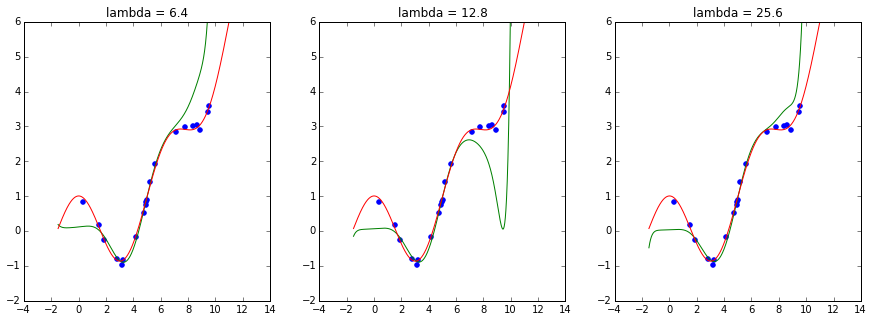

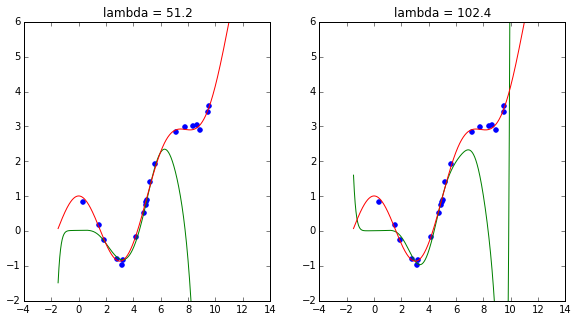

In [409]:
grid_func = np.arange(-1.5,11.5,0.01)
X_train_polynom = get_polynomial_representation(X_train, 15)
X_test_polynom = get_polynomial_representation(X_test, 15)
polynomial_grid = get_polynomial_representation(grid_func, 15)

for i, lambda_ in enumerate(log_grid):
    
    model = My_regression()
    model.fit_regulate(X_train_polynom, Y_train, lambda_)
    
    if i % 3 == 0: plt.figure(figsize=(15,5))    
    
    plt.subplot(1, 3, (i+1)%3)
    plt.scatter(X_train, Y_train, color='blue',label='train samples')
    plt.plot(grid_func, model.predict(polynomial_grid), color='green', label='prediction')
    plt.plot(grid_func, func(grid_func), color='red', label='true function')
    plt.ylim(-2,6)
    
    if i == 0: plt.legend(loc=2)
    plt.title('lambda = {}'.format(lambda_))
    if (i+1) % 3 == 0: plt.show()

Почитаем ошибку и детерминант $|\ X_{tr}^T X_{tr} + \lambda E\ |$ для всех $\lambda$ из сетки, построим графики.

In [410]:
X_train_matrix = np.matrix(X_train_polynom)
train_matrix = X_train_matrix.T * X_train_matrix
errors_l = []
dets_l = []

for lambda_ in log_grid:
    model = My_regression()
    model.fit_regulate(X_train_polynom, Y_train, lambda_)
    prediction = model.predict(X_test_polynom)
    errors_l.append(mse(Y_test.ravel(), prediction.ravel()))
    
    dets_l.append(det(train_matrix + lambda_ * np.eye(15)))

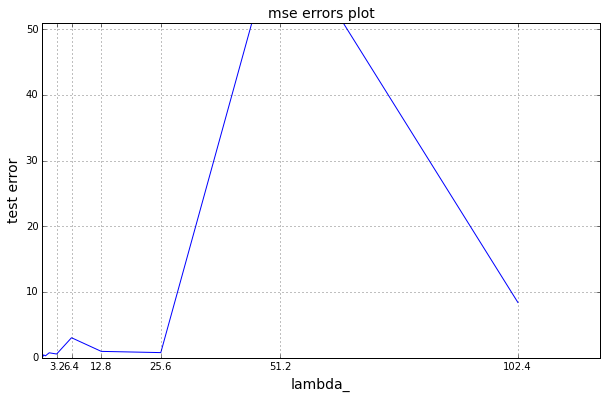

In [412]:
plt.figure(figsize=(10,6))
plt.title('mse errors plot', fontsize=14)
plt.xlabel('lambda_', fontsize=14)
plt.ylabel('test error', fontsize=14)
plt.plot(log_grid, errors_l)
plt.xticks(log_grid[-6:])
plt.grid()
plt.ylim((0,51))
plt.show()

Определители $|\ X_{tr}^T X_{tr} + \lambda E\ |$ улетели в минус бесконечность при всех $\lambda,$ поэтому их графики я не стала строить.

In [413]:
print('Определители: {}'.format(dets_l))

Определители: [-1.8497958722987491e+112, -2.0121879417613864e+113, -2.6738388230954621e+114, -4.3984416499741675e+115, -8.9175984119504782e+116, -2.19553489490319e+118, -6.3729383218258712e+119, -2.0715347441530458e+121, -6.8799697071771741e+122, -1.6255481137269582e+124, 1.1552869552366319e+126]


### Вывод
Для степени многочлена 14 оптимально брать коэффициент регуляризации примерно равным 25.6.

# Задача 5

In [479]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons, make_blobs
from sklearn.metrics import zero_one_loss, accuracy_score

In [495]:
?make_blobs

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


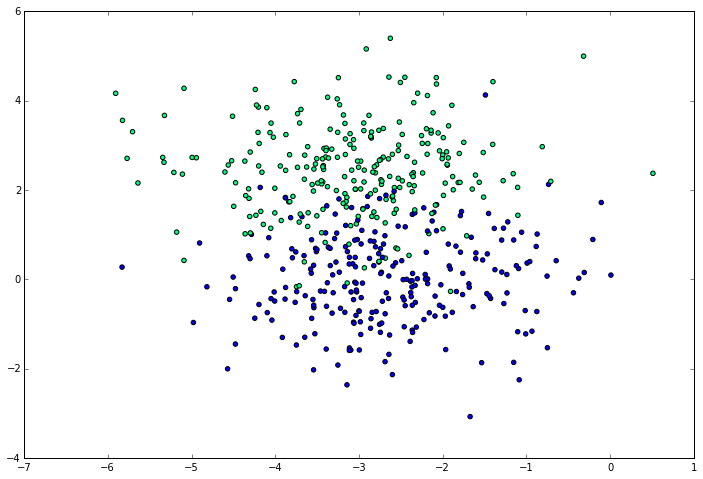

In [502]:
data = make_blobs(n_samples=500, centers=2, center_box=(-7.,7), cluster_std=1.)
X = data[0]
Y = data[1]

plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.show()

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


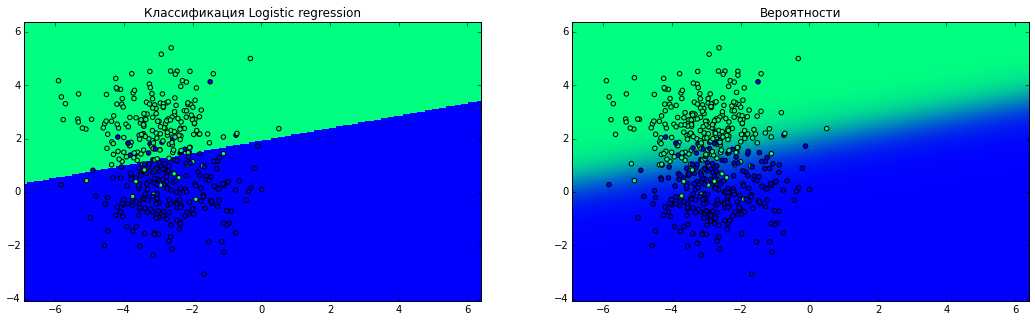

In [503]:
X_train = X[:400]; X_test = X[400:]
Y_train = Y[:400]; Y_test = Y[400:]

model = LogisticRegression(solver='sag').fit(X_train, Y_train)
create_picture(X_train, Y_train, model , X_test, Y_test)

In [504]:
zero_one_loss(Y_test, model.predict(X_test))

0.099999999999999978

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


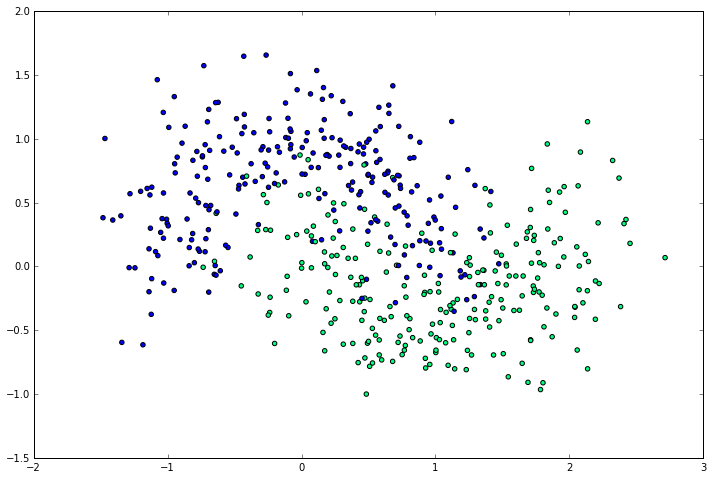

In [490]:
data = make_moons(n_samples=500, noise=0.3)
X = data[0]
Y = data[1]

plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.show()

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


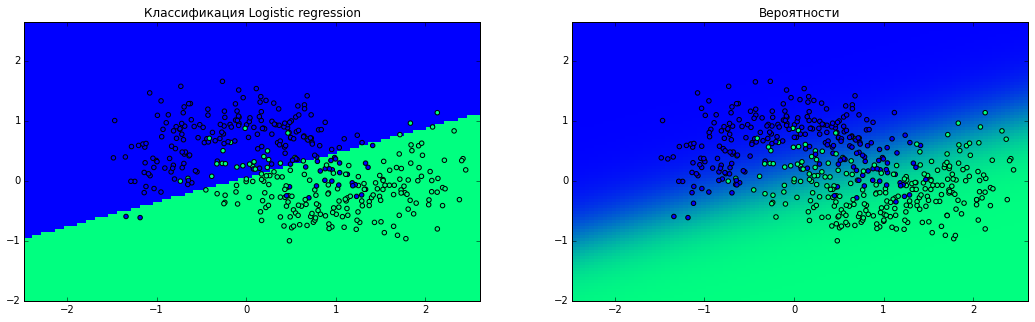

In [491]:
X_train = X[:400]; X_test = X[400:]
Y_train = Y[:400]; Y_test = Y[400:]

model = LogisticRegression(solver='sag').fit(X_train, Y_train)
create_picture(X_train, Y_train, model , X_test, Y_test)

In [492]:
zero_one_loss(Y_test, model.predict(X_test))

0.15000000000000002

### Вывод
С лунами логистическая регрессия справилась чуть похуже, чем с блобами (на 5%), но все равно весьма достойно - точность 84%.

(Дополнительные функции для построения графиков.)

In [472]:
def create_picture(X_train, y_train, model, X_test, Y_test ,border=1, step=0.05, figsize=(18, 5), cmap='winter', alpha=1):
    
    # Создание сетки
    grid = generate_grid(X_train, border, step)
    grid_ravel = np.c_[grid[0].ravel(), grid[1].ravel(0)]  # Выворачивание сетки
    
    # Предсказание значений для сетки
    grid_predicted_ravel = model.predict_proba(grid_ravel)[:, 1]  # Берем вероятности для первого класса
    grid_predicted = grid_predicted_ravel.reshape(grid[0].shape)  # Подгоняем размер
    
    # Построение фигуры
    plt.figure(figsize=figsize)
    
    subplot(1, 2, 1)
    plt.pcolormesh(grid[0], grid[1], grid_predicted > 0.5, cmap=cmap)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=alpha, cmap=cmap)
    plt.xlim((min(grid_ravel[:, 0]), max(grid_ravel[:, 0])))
    plt.ylim((min(grid_ravel[:, 1]), max(grid_ravel[:, 1])))
    plt.title(u'Классификация Logistic regression')
    
    subplot(1, 2, 2)
    plt.pcolormesh(grid[0], grid[1], grid_predicted, cmap=cmap)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=alpha, cmap=cmap)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, alpha=alpha, cmap=cmap)
    plt.xlim((min(grid_ravel[:, 0]), max(grid_ravel[:, 0])))
    plt.ylim((min(grid_ravel[:, 1]), max(grid_ravel[:, 1])))
    plt.title(u'Вероятности')
    
    plt.show()
    
    
    # Удаление лишних данных
    del(grid)
    del(grid_ravel)
    del(grid_predicted_ravel)
    del(grid_predicted)

In [471]:
def generate_grid(train_sample, border=1, step=0.05):
    return np.meshgrid(np.arange(min(train_sample[:, 0]) - border, max(train_sample[:, 1]) + border, step), 
                       np.arange(min(train_sample[:, 1]) - border, max(train_sample[:, 1]) + border, step))